# HOUSE PRICE PREDICTION USING LINEAR REGRESSION

#### Use Linear Regression (Ordinary Least Square) to Predict House Price Problem

### Get Understanding about Data Set

 There are 14 variables in the dataset.
1. CRIM - per capita criome rate by town
2. zn - proportion of residential land zones for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river;0 otherwise)
5. NOX - nitric oxide concentration (parts per million)
6. Rm - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax-rate per \$10,000
11. PTRATIO - pyupil-teacher ratio by town
12. B- 1000(Bk - 0.63)^2 where Bk is the proportion of blaks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's 

## import library

In [4]:
import pandas as pd

In [5]:
import numpy as np

## import CSV as Dataframe

#### use URL of file directly

In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/swapan007/My-Notes-Machine-Learning/master/datasets/Boston.csv")

#### or use local file path in Jupyter Notebook

In [9]:
# df=pd.read_csv(r"C:\Users\SWAPAN\OneDrive\Desktop\ybf\datasets\Boston.csv")

#### or use file path after uploading file in Google Colab Notebook

In [10]:
# df=pd.read_csv(r"/content/Boston.csv")

### get the first five rows of DataFrame

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### get information of DataFrame

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### get the summary statistics

In [13]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### get column names

In [14]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

### get Shape of DataFrame

In [15]:
df.shape

(506, 14)

### Define y (dependent or label or target variable) and X (independent or features or attribute Variable)

In [16]:
y=df['MEDV']

In [18]:
y.shape

(506,)

In [19]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [21]:
x=df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

#### or use drop function to define X

In [25]:
# b=df.drop("MEDV",axis=1)

In [28]:
x.shape

(506, 13)

In [29]:
x

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


## Get X Variables Standardized

standardization of datasets is a common requirements for many machine learning estimators implemented on scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

Next approach is go for MinMax scaler

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
mm=MinMaxScaler()

In [32]:
x=mm.fit_transform(x)

In [33]:
x

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

## get train test split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2525)

In [37]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

## Get Model Train

In [38]:
from sklearn.linear_model import LinearRegression

In [40]:
lr= LinearRegression()

In [41]:
lr.fit(x_train,y_train)

LinearRegression()

## Get Model Prediction

In [42]:
y_pred=lr.predict(x_test)

In [43]:
y_pred.shape

(152,)

In [44]:
y_pred

array([32.98634316, 35.2406743 , 16.62758122, 40.3318607 , 15.29452458,
       27.57696765, 23.82471541, 31.42409603, 16.84253582, 20.48519719,
       22.82665959, 20.15322169, 36.66480608, 32.08698687, 14.99253072,
       20.5518755 , 22.38226001, 14.91874528, 17.09770193, 15.40099328,
        6.43775277, 24.36566601, 20.97332822, 22.62736747, 29.49639561,
       22.90695909, 24.16315872, 20.63068979, 28.5571408 , 28.60247338,
       11.24703602, 24.80133183, 13.76798758, 14.24676545, 13.40205853,
       19.87532815, 33.54827052, 35.33427556,  7.12537097, 29.08655328,
       19.09582295, 22.67194216, 36.59309069, 31.18646126, 23.09271082,
       24.55173008, 40.34901292, 32.41638077, 24.18442488, 34.02006894,
       27.0958673 , 19.78489046, 17.11483258, 15.91670929,  8.99996805,
       18.35318214, 19.09671147, 24.16950974, 25.28788298, 28.21924681,
       12.0310766 , 34.2730736 , 31.90702772, 29.86373586, 18.97948735,
       28.02235678, 29.33954752, 26.36874779, 35.68081367, 20.92

## Get Model Evaluation

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [46]:
mean_squared_error(y_test,y_pred)

23.060350223536016

In [47]:
mean_absolute_error(y_test,y_pred)

3.210282895105503

In [48]:
r2_score(y_test,y_pred)

0.7311944658318734

## Get Visualization of Actual Vs Predicted Results

In [49]:
import matplotlib.pyplot as plt

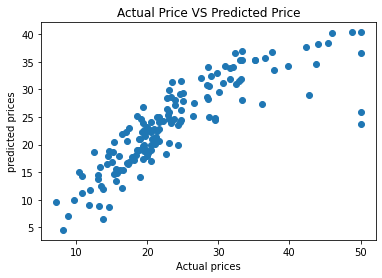

In [51]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual prices")
plt.ylabel("predicted prices")
plt.title("Actual Price VS Predicted Price")
plt.show()

## Get Future Predictions
### Lets select a random sample from existing dataset as new value
#### steps to follow
1. Extract a random row using sample function
2. Separate x and y
3. Standardize x
4. Predict


In [78]:
x_new=df.sample(1)

In [79]:
x_new

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
67,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.498,4,345.0,18.9,396.21,8.1,22.0


In [71]:
x_new.shape

(1, 14)

In [72]:
x_new = x_new.drop('MEDV',axis=1)

In [73]:
x_new

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0,0.46,6.333,17.2,5.2146,4,430.0,16.9,375.21,7.34


In [74]:
x_new.shape

(1, 13)

In [75]:
x_new=mm.fit_transform(x_new)

In [76]:
y_pred_new=lr.predict(x_new)

In [77]:
y_pred_new

array([28.35362301])